# [PLEASE SEE BLOG POST HERE](https://jpfreeley.github.io/project/dsi/python/eda/munging/cleaning/billboard/2016/10/02/GA-DSI-Project-02/)

In [66]:
#INITIALIZE LIBRARIES AND NOTEBOOK OPTIONS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pprint as pprint

from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

#HELPER FUNCTION ExcelDate to DATETIME
def xldate_to_datetime(xldate):
	temp = datetime.datetime(1900, 1, 1)
	delta = datetime.timedelta(days=xldate)
	return temp+delta

#READ IN TEXT DATA
IN_FILE = 'assets/all_billboard_data.txt'
df = pd.read_csv(IN_FILE, delimiter='|')

#FOR SPEEDY TESTING, SET HEAD > 0 FOR SMALLER DATASET
HEAD = 0

if HEAD > 0:
    snip_df = df.head(HEAD)
else:
    snip_df = df

#DELETE ALL NaN DATE OF ENTRIES -- 70 records in total
snip_df = snip_df[snip_df['chart entry date'].notnull()]

#INITIALIZE LOOKUP FOR MONTH NAMES
MONTHS = {1:'Jan',
          2:'Feb',
          3:'Mar',
          4:'Apr',
          5:'May',
          6:'Jun',
          7:'Jul',
          8:'Aug',
          9:'Sep',
          10:'Oct',
          11:'Nov',
          12:'Dec'
         }

#INITIALIZE BINS FOR MONTH HISTOGRAMS
binMonth = 12


NULL-HYPOTHESIS: Between Jan 1999 and December 2004, the mean of the overall weeks for a song to appear on the Hot100 list which Debuts on the list in the month of June is no different than the mean of a song which debuts in any other month.

array([2001, 2002, 1999, 2000, 2003, 2004])
3     199
5     185
10    183
12    179
8     178
4     177
11    166
9     159
6     159
2     155
1     152
7     146
Name: chart.enter.month, dtype: int64
MEAN Month Jan Test: 15.223684 Others: 16.237010 Diff: 1.013325
ttest_ind:            t = -1.27432  p = 0.204275
MEAN Month Feb Test: 15.716129 Others: 16.198088 Diff: 0.481959
ttest_ind:            t = -0.6758  p = 0.500028
MEAN Month Mar Test: 16.180905 Others: 16.159326 Diff: 0.021579
ttest_ind:            t = 0.0321039  p = 0.974416
MEAN Month Apr Test: 15.615819 Others: 16.213326 Diff: 0.597507
ttest_ind:            t = -0.948236  p = 0.344056
MEAN Month May Test: 17.194595 Others: 16.058284 Diff: 1.136311
ttest_ind:            t = 1.58573  p =

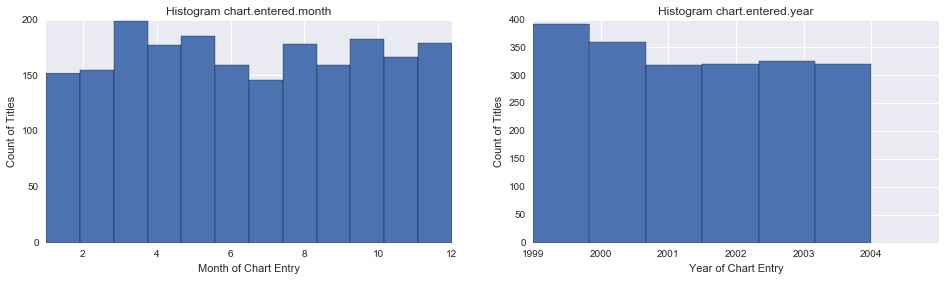

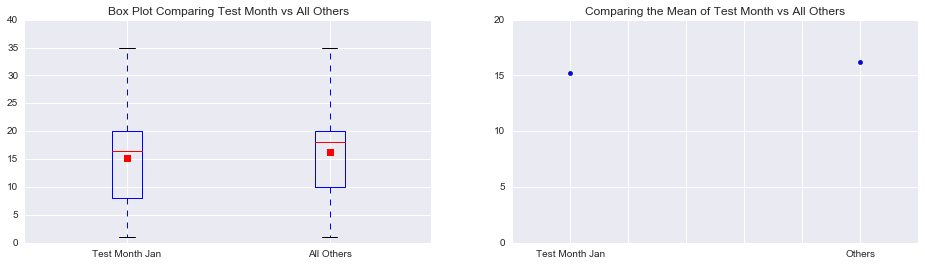

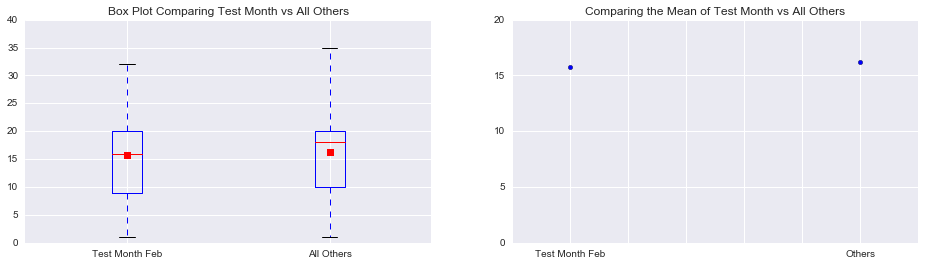

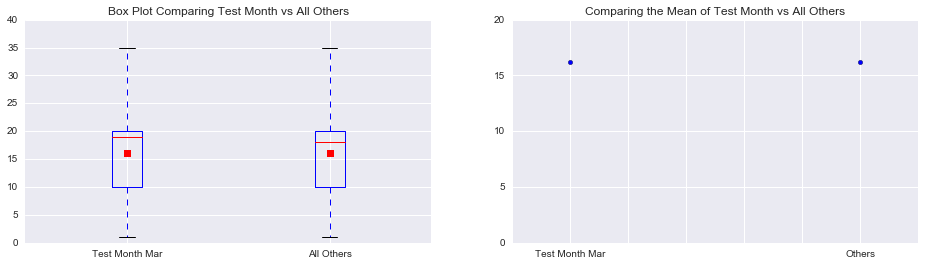

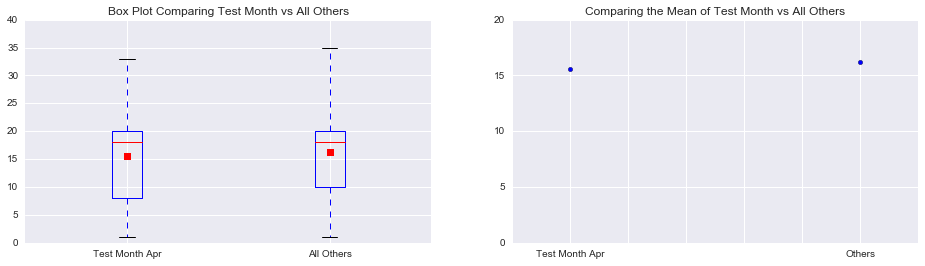

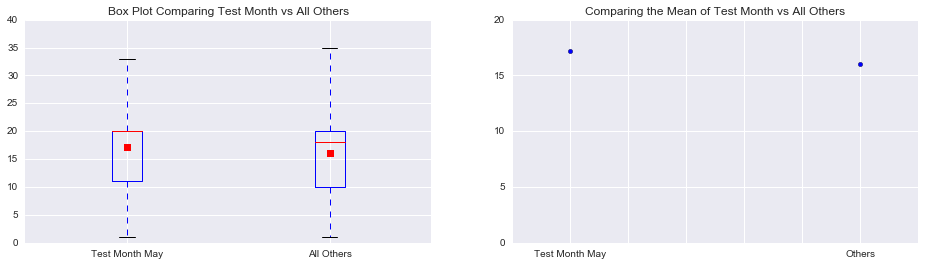

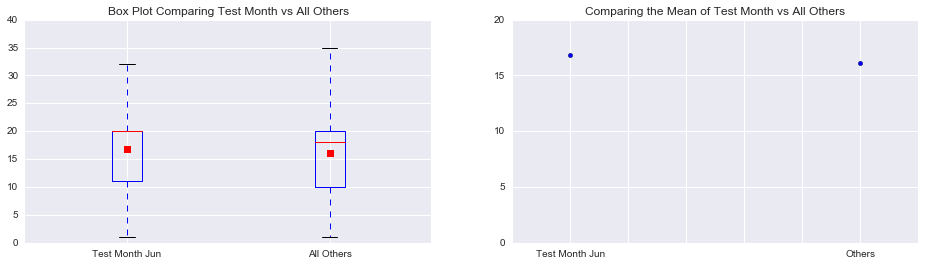

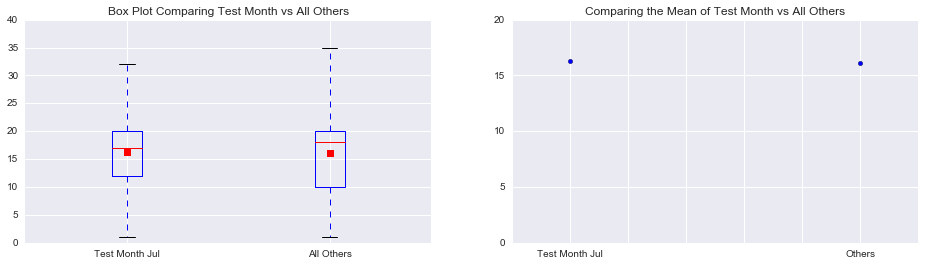

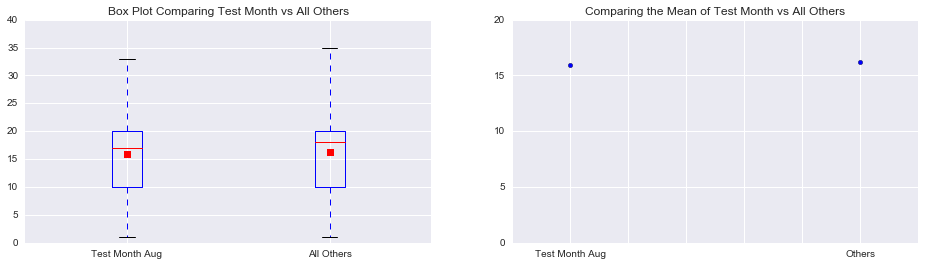

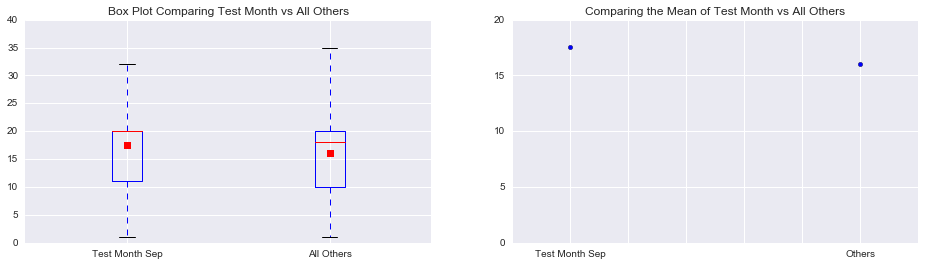

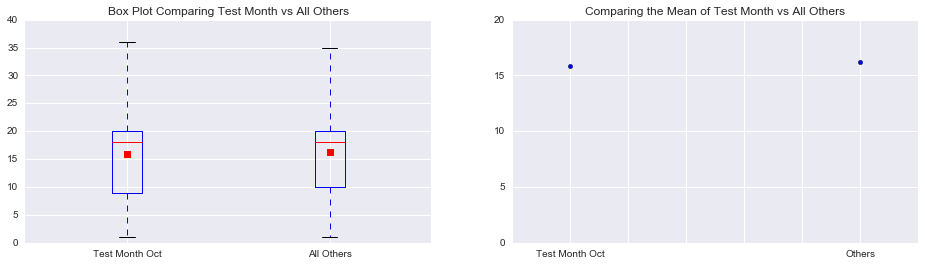

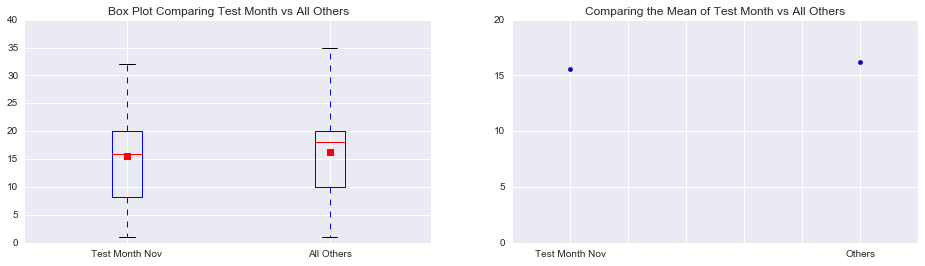

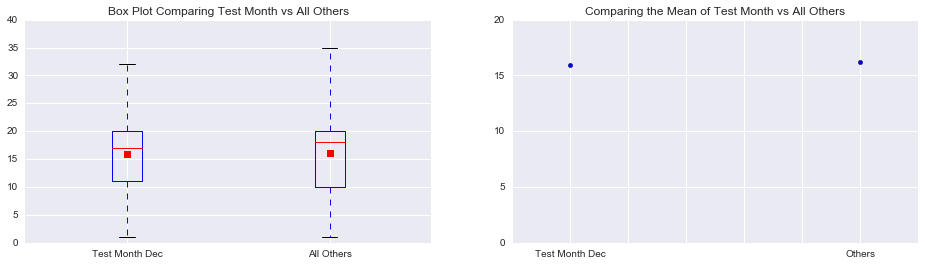

In [68]:
#INITIALIZE CONSTANTS
YEAR_START = 1999
YEAR_END = 2004

NUM_MONTHS = 12
TEST_MONTH = 0

print "NULL-HYPOTHESIS: Between Jan 1999 and December 2004, the mean of the overall weeks for a song to appear on the Hot100 list which Debuts on the list in the month of June is no different than the mean of a song which debuts in any other month."

#CONVERT EXCEL DATE TO STANDARD DATETIME
snip_df['chart.enter.date'] = snip_df['chart entry date'].apply(xldate_to_datetime)

#INITIALIZE CHART ENTER MONTH AND YEAR
snip_df['chart.enter.month'] = snip_df['chart.enter.date'].apply(lambda x: x.month)
snip_df['chart.enter.year'] = snip_df['chart.enter.date'].apply(lambda x: x.year)

#SUBSET THE DATASET TO ONLY THE YEARS OF INTEREST
year_df = snip_df[(snip_df['chart.enter.year'] >= YEAR_START) & (snip_df['chart.enter.year'] <= YEAR_END )]

#FLATTEN TITLE DATA
trim = year_df.pivot_table(values=['overall weeks on chart'],\
                           columns=['title','chart.enter.month','chart.enter.year'],\
                           aggfunc=max).T.reset_index()
#DROP REPETITIVE COLUMN
trim = trim.drop('level_0', 1)

#RENAME COLUMNS
trim.columns = ['title','chart.enter.month','chart.enter.year','overall weeks on chart']

#DISPLAY NOTES REGARDING YEARS OF INTEREST
print
pprint.pprint(trim['chart.enter.year'].unique())
print trim['chart.enter.month'].value_counts()

#PLOT THE HISTOGRAMS
fig, axes2 = plt.subplots(1,2, figsize=(16,4))
axes2[0].hist(trim['chart.enter.month'],bins=binMonth)
axes2[0].set_title("Histogram chart.entered.month")
axes2[0].set_xlim([1, 12])
axes2[0].set_xlabel("Month of Chart Entry")
axes2[0].set_ylabel("Count of Titles")
axes2[1].hist(trim['chart.enter.year'], bins=YEAR_END-YEAR_START+1)
axes2[1].set_title("Histogram chart.entered.year")
axes2[1].set_xticklabels(['1999','2000','2001','2002','2003','2004'])
axes2[1].set_xlabel("Year of Chart Entry")
axes2[1].set_ylabel("Count of Titles")
if TEST_MONTH != 0:
    plt.show()

trim.describe()
overall_mean = trim['overall weeks on chart'].mean()

#RUN THROUGH LOOP OF ALL MONTHS
for i in range(1,NUM_MONTHS+1):
    if TEST_MONTH != 0:
        i = TEST_MONTH
    #INITIALIZE DF FOR MONTH BEING TESTED
    month_df_TEST = trim[(trim['chart.enter.month'] == i)]
    mean_weeks_month = month_df_TEST['overall weeks on chart'].mean()

    #INITIALIZE DF FOR ALL OTHER MONTHS
    month_df_NOTTEST = trim[(trim['chart.enter.month'] != i)]
    mean_weeks_month_not = month_df_NOTTEST['overall weeks on chart'].mean()
    
    #INITIALIZE DATA FOR AND DISPLAY BOXPLOT
    data = [month_df_TEST['overall weeks on chart'],month_df_NOTTEST['overall weeks on chart']]
    label = "Test Month " + MONTHS[i]
    fig, axes3 = plt.subplots(1,2, figsize=(16,4))

    #PRINT THE BOXPLOT AND SCATTER
    axes3[0].boxplot(data,showmeans=True, labels=[label,'All Others'])
    axes3[0].set_ylim([0,40])
    axes3[0].set_title("Box Plot Comparing Test Month vs All Others")
    data = [1, 2]
    means = [mean_weeks_month, mean_weeks_month_not]
    axes3[1].set_title("Comparing the Mean of Test Month vs All Others")
    axes3[1].set_ylim([0,20])
    axes3[1].set_xticklabels(['',label,'','','','','Others'])
    axes3[1].scatter(y=means, x=data)
    #SUPPRESS PRINTING CHARTS IF ALL MONTHS
    if TEST_MONTH != 0:
        plt.show()
    #SUPPRESS PRINTING DESCRIBE IF ALL MONTHS
    if TEST_MONTH != 0:
        print "TEST MONTH - ", TEST_MONTH
        print month_df_TEST.describe()
        print
        print "ALL OTHER MONTHS"
        print month_df_NOTTEST.describe()

    #CALC THE DIFFERENCE BETWEEN MEAN MONTH AND ALL OTHERS
    mean_weeks_diff = abs(mean_weeks_month - mean_weeks_month_not)
    print "MEAN Month %s Test: %f Others: %f Diff: %f" % (MONTHS[i], mean_weeks_month, mean_weeks_month_not, \
                                                          mean_weeks_diff)
    #print stats.ttest_1samp(month_df_TEST['overall weeks on chart'],mean_weeks_month_not)
    a = month_df_TEST['overall weeks on chart']
    b = month_df_NOTTEST['overall weeks on chart']

    # Use scipy.stats.ttest_ind.
    t, p = ttest_ind(a, b, equal_var=False)
    print("ttest_ind:            t = %g  p = %g" % (t, p))
    
    if TEST_MONTH != 0:
        break


#### BELOW HERE NOT RELEVANT TO PROJECT

In [158]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

a = month_df_TEST['overall weeks on chart']
b = month_df_NOTTEST['overall weeks on chart']

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

# Compute the descriptive statistics of a and b.
abar = a.mean()
avar = a.var(ddof=1)
na = a.size
adof = na - 1

bbar = b.mean()
bvar = b.var(ddof=1)
nb = b.size
bdof = nb - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

ttest_ind:            t = -0.31737  p = 0.751268
ttest_ind_from_stats: t = -0.31737  p = 0.751268


In [58]:
df.dtypes

pos                         int64
last week                  object
peak                      float64
weeks on chart            float64
title                      object
artist                     object
chart entry date          float64
entry position            float64
overall peak              float64
overall weeks on chart    float64
chart date                  int64
dtype: object

In [10]:
import pandas as pd
import numpy as np

def replace_nulls(value):
    if value == '*':
        return np.nan
    else:
        return value
    
def stndz_genres(value):
    if 'roll' in value:
        return 'Rock'
    elif value == 'R & B':
        return 'R&B'
    else:
        return value

def cleanTime(value):
    value.split(',')[2]
    duration = (int(value.split(',')[0]) * 60) + int(value.split(',')[1])
    return duration
    
#objects to ints on the week columns

#df.to_numeric(errors=ignore)

df = pd.read_csv('assets/billboard.csv')
df.head()
df.dtypes
df['genre'].unique()
df['genre'] = df['genre'].apply(stndz_genres)
df['time'].unique()
df['time'] = df['time'].apply(cleanTime) #convert strange "time" to seconds
df.rename(columns={'time': 'duration'}, inplace=True)

df.columns

df = df.applymap(replace_nulls) #convert "*" to "NaN" on all xN.week columns
df.iloc[:,7:] = df.iloc[:,7:].apply(pd.to_numeric,errors='ignore') #cast column to FLOAT (after we've altered * to 'NaN')
df['chart_weeks'] = df.iloc[:,7:].count(axis=1) #add column which calcs the num weeks on chart
df['date.entered'] = pd.to_datetime(df['date.entered'])
df['date.peaked'] = pd.to_datetime(df['date.peaked'])

df
#df[df['genre'] == 'Country']

,year,artist.inverted,track,duration,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,chart_weeks
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
5,2000,Janet,Doesn't Really Matter,257,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
6,2000,Destiny's Child,Say My Name,271,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
7,2000,"Iglesias, Enrique",Be With You,216,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
8,2000,Sisqo,Incomplete,232,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
9,2000,Lonestar,Amazed,265,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55


In [73]:
sorted(df['date.entered'].unique())

['April 1, 2000',
 'April 15, 2000',
 'April 22, 2000',
 'April 29, 2000',
 'April 8, 2000',
 'August 12, 2000',
 'August 19, 2000',
 'August 26, 2000',
 'August 5, 2000',
 'December 11, 1999',
 'December 16, 2000',
 'December 18, 1999',
 'December 2, 2000',
 'December 23, 2000',
 'December 25, 1999',
 'December 30, 2000',
 'December 4, 1999',
 'February 12, 2000',
 'February 19, 2000',
 'February 26, 2000',
 'February 5, 2000',
 'January 1, 2000',
 'January 15, 2000',
 'January 22, 2000',
 'January 29, 2000',
 'January 8, 2000',
 'July 1, 2000',
 'July 15, 2000',
 'July 17, 1999',
 'July 22, 2000',
 'July 29, 2000',
 'July 8, 2000',
 'June 10, 2000',
 'June 17, 2000',
 'June 24, 2000',
 'June 3, 2000',
 'June 5, 1999',
 'March 11, 2000',
 'March 18, 2000',
 'March 25, 2000',
 'March 4, 2000',
 'May 13, 2000',
 'May 20, 2000',
 'May 27, 2000',
 'May 6, 2000',
 'November 11, 2000',
 'November 13, 1999',
 'November 18, 2000',
 'November 20, 1999',
 'November 25, 2000',
 'November 27, 199